<a href="https://colab.research.google.com/github/coderhetal/Music-genre-classification-/blob/main/MUSIC_GENRE_CLASSIFICATION_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MUSIC GENRE CLASSIFICATION**

#Loading data :

In [ ]:
#loading data
!wget 'download.zip'   'https://osf.io/drjhb/download'

--2023-06-13 16:05:47--  http://download.zip/
Resolving download.zip (download.zip)... 76.76.21.21
Connecting to download.zip (download.zip)|76.76.21.21|:80... connected.
HTTP request sent, awaiting response... 308 Permanent Redirect
Location: https://download.zip/ [following]
--2023-06-13 16:05:47--  https://download.zip/
Connecting to download.zip (download.zip)|76.76.21.21|:443... connected.
HTTP request sent, awaiting response... 308 Permanent Redirect
Location: https://www.download.zip/ [following]
--2023-06-13 16:05:47--  https://www.download.zip/
Resolving www.download.zip (www.download.zip)... 76.76.21.22, 76.76.21.164
Connecting to www.download.zip (www.download.zip)|76.76.21.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31964 (31K) [text/html]
Saving to: ‘index.html’

index.html          100%[===================>]  31.21K  --.-KB/s    in 0s      

2023-06-13 16:05:47 (160 MB/s) - ‘index.html’ saved [31964/31964]

--2023-06-13 16:05:47--  https:/

#Unzipping the data :

In [ ]:
#unzipping the data
!unzip '/content/download'


Archive:  /content/download
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues.00014.wav  
  inflating: Data/genre

#Importing the library

In [ ]:
#importing the library
import os
# Interact with the operating system for file and directory manipulation.
import matplotlib.pyplot as plt
# Create visualizations and plots in Python.

import torch
# Machine learning library with tensor operations and neural network support.
import torchaudio
 # Audio processing library built on top of PyTorch for working with audio data.

import torch.nn as nn
 # Module for defining and working with neural networks in PyTorch.
import gc
 # Garbage collection module for memory management and resource cleanup.

import torch.nn.functional as F
# Functional interface for neural network operations in PyTorch.
from torchvision.datasets import ImageFolder
 # Dataset class for loading image data, particularly useful for image classification.

import torchvision.transforms as transforms
# Preprocessing transformations for images, such as resizing and normalization.
from torch.utils.data import DataLoader
 # Data loading utility for creating mini-batches during training.




#Check if CUDA is available

In [ ]:
if torch.cuda.is_available():
  dev = "cuda:0"
else:
  dev = "cpu"
device = torch.device(dev)
print(f"Using {device} device")
print(torch.cuda.get_device_name(torch.cuda.current_device()))

Using cuda:0 device
Tesla T4


#plotting the spectogram

In [ ]:
#plotting the spectogram
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    #figure.suptitle(title)
    #plt.show(block=False)

#Creating directories and splitting data in train and test :

In [ ]:
l = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]


Creating directories for test and train set

In [ ]:
os.mkdir('/content/Train_image/')
for i in range(0,10):
  os.mkdir('/content/Train_image/' + l[i])

os.mkdir('/content/Test_image')
for i in range(0,10):
  os.mkdir('/content/Test_image/' + l[i])

FileExistsError: ignored

Plotting spectrograms for train set and adding in directory

In [ ]:
#Plotting Training Spectrograms
for i in range(0,10):

  dir_path = '/content/Data/genres_original/' + l[i]
  lst1 = os.listdir(dir_path)
  os.chdir('/content/Train_image/' + l[i])

  for j in range(0,90):
    path = dir_path + '/' + lst1[j]

    if path != '/content/Data/genres_original/jazz/jazz.00054.wav':

      waveform , sample_rate = torchaudio.load(path)

      plot_specgram(waveform, sample_rate, lst1[j])
      plt.savefig(lst1[j] + '.png')
      plt.close()

    else:
      pass

gc.collect()

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


110

Plotting spectrograms for test set and adding in directory

In [ ]:
#Plotting Testing Spectrograms
for i in range(0,10):

  dir_path = '/content/Data/genres_original/' + l[i]
  lst1 = os.listdir(dir_path)
  os.chdir('/content/Test_image/' + l[i])

  for j in range(90,100):
    path = dir_path + '/' + lst1[j]

    if path != '/content/Data/genres_original/jazz/jazz.00054.wav':

      waveform , sample_rate = torchaudio.load(path)

      plot_specgram(waveform, sample_rate, lst1[j])
      plt.savefig(lst1[j] + '.png')
      plt.close()

    else:
      pass

gc.collect()

2846509

#Dataloader

In [ ]:
'''#DATALOADER
tran = transforms.Compose([transforms.ToTensor(), transforms.Resize((256,256))])
data_set = ImageFolder('/content/Train_image/', transform = tran)
data =DataLoader(data_set, batch_size =128, shuffle=True)'''

#CNN Model

In [ ]:
#CNN MODEL
class Net(nn.Module):

  def __init__(self):
    super(Net,self).__init__()
    self.C1=nn.Sequential(
            nn.Conv2d(3,16,kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.C2=nn.Sequential(
            nn.Conv2d(16,32,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)

    )
    self.C3=nn.Sequential(
            nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.L1=nn.Linear(32*32*64,4096)
    self.L2=nn.Linear(4096,2048)
    self.L3=nn.Linear(2048,1024)
    self.L4=nn.Linear(1024,512)
    self.L5=nn.Linear(512,10)

  def forward(self, x):
    x=self.C1(x)
    x=self.C2(x)
    x=self.C3(x)
    x=x.reshape(x.size(0),-1)
    x=F.relu(self.L1(x))
    x=F.relu(self.L2(x))
    x=F.relu(self.L3(x))
    x=F.relu(self.L4(x))
    x=(self.L5(x))
    return F.log_softmax(x)

#Normalizing :

In [ ]:
#Checking Image Dimensions
import torchvision
import matplotlib.image as mpimg
#Checking Image Dimensions
img = mpimg.imread('/content/Data/genres_original/jazz/jazz.00052.wav')
print(img.shape)
#Mean and Deviation
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
#Loading Normalised Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean, std), transforms.Resize((224,224))])
data_set = torchvision.datasets.ImageFolder('/content/Train_image/', transform = transform)
data = DataLoader(data_set, batch_size = 100, shuffle = True)

(480, 640, 4)


In [ ]:
net=Net()
net = net.to(device)
criterion = nn.CrossEntropyLoss()
loss_fn=nn.CrossEntropyLoss()

optimizer

In [ ]:

#OPTIMIZER
optimizer = torch.optim.SGD(net.parameters(), lr=0.001,momentum=0.99)


In [ ]:
epoch=100

#Training model:

In [ ]:
#TRAINING
l=[]
accuracy=[]
e=[]

for j in range(epoch):
  torch.cuda.empty_cache()
  gc.collect()
  for i, (img,lbl) in enumerate(data):
    img = img.to(device)
    lbl = lbl.to(device)
    out=net(img)
    loss=loss_fn(out,lbl)
    l.append(float(loss))
    total=lbl.size(0)
    _, predicted = torch.max(out.data , 1)
    correct = (predicted == lbl).sum().item()
    acc = correct*100/total
    accuracy.append(acc)
    if i%10 == 0:
      print(loss)
      print(acc)
    #predicted=torch.max(out.data,1)
    loss = loss_fn(out,lbl)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

<ipython-input-14-05f6663e9d90>:41: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


tensor(2.3046, device='cuda:0', grad_fn=<NllLossBackward0>)
10.0
tensor(2.3022, device='cuda:0', grad_fn=<NllLossBackward0>)
9.0
tensor(2.2907, device='cuda:0', grad_fn=<NllLossBackward0>)
11.0
tensor(2.2698, device='cuda:0', grad_fn=<NllLossBackward0>)
25.0
tensor(2.2582, device='cuda:0', grad_fn=<NllLossBackward0>)
30.0
tensor(2.2368, device='cuda:0', grad_fn=<NllLossBackward0>)
28.0
tensor(2.1336, device='cuda:0', grad_fn=<NllLossBackward0>)
34.0
tensor(2.0925, device='cuda:0', grad_fn=<NllLossBackward0>)
30.0
tensor(1.9608, device='cuda:0', grad_fn=<NllLossBackward0>)
34.0
tensor(1.9973, device='cuda:0', grad_fn=<NllLossBackward0>)
27.0
tensor(1.6942, device='cuda:0', grad_fn=<NllLossBackward0>)
42.0
tensor(1.8022, device='cuda:0', grad_fn=<NllLossBackward0>)
34.0
tensor(1.5918, device='cuda:0', grad_fn=<NllLossBackward0>)
39.0
tensor(1.4373, device='cuda:0', grad_fn=<NllLossBackward0>)
43.0
tensor(1.4875, device='cuda:0', grad_fn=<NllLossBackward0>)
46.0
tensor(1.2190, device='cud

#Plots:

In [ ]:
print(accuracy)

[10.0, 10.0, 14.0, 14.0, 14.0, 10.0, 3.0, 6.0, 9.090909090909092, 9.0, 20.0, 24.0, 15.0, 18.0, 16.0, 18.0, 18.0, 13.131313131313131, 11.0, 18.0, 18.0, 14.0, 21.0, 17.0, 33.0, 25.0, 20.2020202020202, 25.0, 28.0, 26.0, 31.0, 32.0, 35.0, 35.0, 25.0, 22.22222222222222, 30.0, 40.0, 34.0, 28.0, 27.0, 34.0, 34.0, 31.0, 23.232323232323232, 28.0, 34.0, 28.0, 35.0, 34.0, 29.0, 30.0, 29.0, 27.272727272727273, 34.0, 30.0, 34.0, 27.0, 29.0, 30.0, 19.0, 28.0, 22.22222222222222, 30.0, 26.0, 41.0, 26.0, 33.0, 32.0, 31.0, 24.0, 31.31313131313131, 34.0, 30.0, 33.0, 37.0, 34.0, 31.0, 28.0, 38.0, 33.333333333333336, 27.0, 36.0, 38.0, 33.0, 41.0, 32.0, 34.0, 41.0, 38.38383838383838, 42.0, 26.0, 40.0, 35.0, 33.0, 26.0, 47.0, 38.0, 40.4040404040404, 34.0, 41.0, 32.0, 43.0, 26.0, 44.0, 41.0, 38.0, 41.41414141414141, 39.0, 33.0, 30.0, 43.0, 39.0, 47.0, 50.0, 38.0, 42.42424242424242, 43.0, 40.0, 36.0, 39.0, 31.0, 37.0, 45.0, 58.0, 42.42424242424242, 46.0, 47.0, 38.0, 36.0, 47.0, 42.0, 42.0, 43.0, 40.40404040404

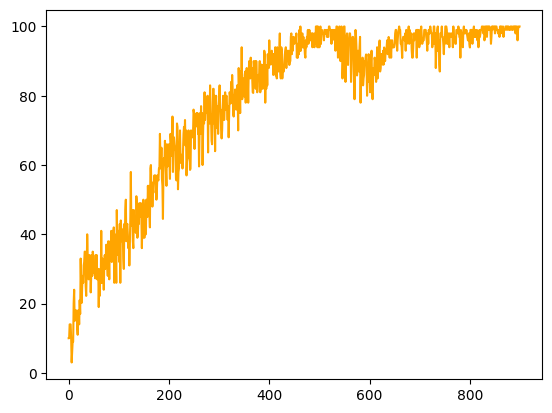

In [ ]:
#PLOTTING ACCURACY
plt.plot(accuracy,"orange")


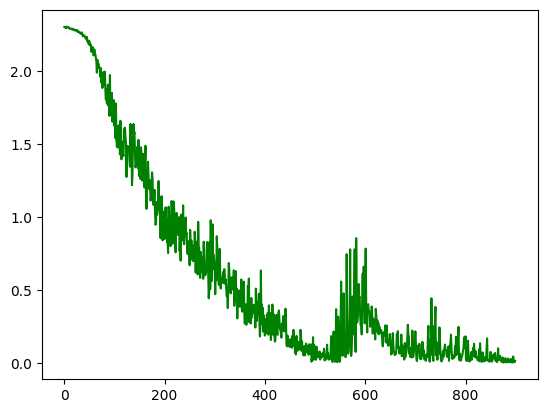

In [ ]:
#PLOTTING LOSS
plt.plot(l,"green")

#Testing data :

#TEST SET DATALOADER

In [ ]:
#TEST SET DATALOADER
tran = transforms.Compose([transforms.ToTensor(), transforms.Resize((256,256))])
data_set = ImageFolder('/content/Test_image/', transform = tran)
data =DataLoader(data_set, batch_size =100, shuffle=True)

#Determining accuracy for test set

In [ ]:
#TESTING
l=[]
accuracy=[]


for j in range(1):
  torch.cuda.empty_cache()
  gc.collect()
  for i, (img,lbl) in enumerate(data):
    img = img.to(device)
    lbl = lbl.to(device)
    out=net(img)
    loss=loss_fn(out,lbl)
    l.append(float(loss))
    total=lbl.size(0)
    _, predicted = torch.max(out.data , 1)
    correct = (predicted == lbl).sum().item()
    acc = correct*100/total
    accuracy.append(acc)
    if i%10 == 0:
      print(loss)
      print(acc)
    #predicted=torch.max(out.data,1)
    #loss = loss_fn(out,lbl)
    #optimizer.zero_grad()
    #loss.backward()
    #optimizer.step()

tensor(2.8954, device='cuda:0', grad_fn=<NllLossBackward0>)
66.0


<ipython-input-14-05f6663e9d90>:41: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


#Downloading ResNet18

In [ ]:
import torch
from torchvision import models

In [ ]:
#Downloading ResNet18
model = models.resnet18(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 10) #(num_of_class == 10)
model = model.to(device)
criterion = nn.CrossEntropyLoss()  #(set loss function)
optimizer = torch.optim.Adam(model.parameters())

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 254MB/s]


In [ ]:
#@title Training ResNet18
loss_func = []
accuracy = []

for i in range(0,20):
  model.train()
  torch.cuda.empty_cache()
  gc.collect()
  for k, (images,labels) in enumerate(data):
    images = images.to(device)
    labels = labels.to(device)
    output = model(images)
    loss = criterion(output, labels)
    loss_func.append(float(loss))
    total = labels.size(0)
    _, predicted = torch.max(output.data , 1)
    correct = (predicted == labels).sum().item()
    acc = correct*100/total
    accuracy.append(acc)
    if k%10 == 0:
      print(loss)
      print(acc)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


tensor(2.4414, device='cuda:0', grad_fn=<NllLossBackward0>)
4.0
tensor(1.3593, device='cuda:0', grad_fn=<NllLossBackward0>)
62.0
tensor(0.6591, device='cuda:0', grad_fn=<NllLossBackward0>)
79.0
tensor(0.4668, device='cuda:0', grad_fn=<NllLossBackward0>)
85.0
tensor(0.2434, device='cuda:0', grad_fn=<NllLossBackward0>)
96.0
tensor(0.0707, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0394, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0203, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0114, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0052, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0021, d

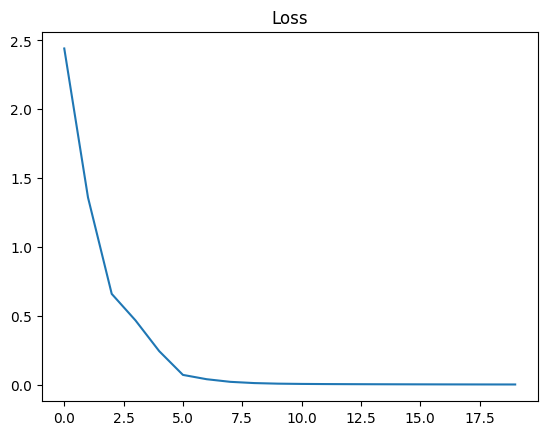

In [ ]:
#@title Plotting Loss for ResNet18
plt.plot(loss_func)
plt.title("Loss")
plt.show()

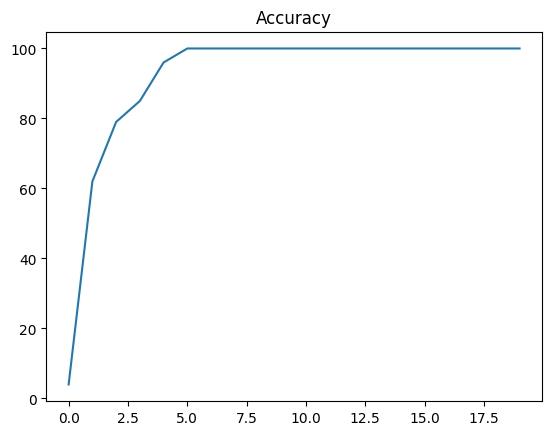

In [ ]:
#@title Plotting Accuracy for ResNet18
plt.plot(accuracy)
plt.title("Accuracy")
plt.show()

In [ ]:
#@title Checking Test Accuracy for ResNet18
for k, (img,lab) in enumerate(data):
    img = img.to(device)
    lab = lab.to(device)
    output = model(img)
    loss = criterion(output, lab)
    total = lab.size(0)
    _, predicted = torch.max(output.data , 1)
    correct = (predicted == lab).sum().item()
    acc = correct*100/total
    print(loss)
    print(acc)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
